In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Library
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

## The Data

In [7]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Decision Tree/Churn_Modelling.csv')
Churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Data Cleaning

In [8]:
to_drop=['RowNumber','CustomerId','Surname']
Churn=Churn.drop(to_drop,axis=1)
Churn.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [9]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
Gender = pd.get_dummies(Churn['Gender'],drop_first=True)
Geo = pd.get_dummies(Churn['Geography'],drop_first=True)

In [11]:
Churn.drop(['Gender','Geography'],axis=1,inplace=True)

In [12]:
Churn = pd.concat([Churn,Gender,Geo],axis=1)
Churn.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Male  Germany  Spain  
0               1        101348.88       1     0        0      0  
1               1        112542.58       0     0        0      1  
2               0        113931.57       1     0        0      0  
3               0         93826.63       0     0        0      0  
4               1         79084.10       0     0        0      1

In [13]:
#Churn.CreditScore = np.log(Churn.CreditScore)
#Churn.Age = np.sqrt(Churn.Age)

In [14]:
Churn.shape

(10000, 12)

In [15]:
Churn.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Male  Germany  Spain  
0               1        101348.88       1     0        0      0  
1               1        112542.58       0     0        0      1  
2               0        113931.57       1     0        0      0  
3               0         93826.63       0     0        0      0  
4               1         79084.10       0     0        0      1

In [16]:
#Churn.Exited=Churn['Exited'].astype('category')

# Building a  model
## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = Churn.drop('Exited',axis=1)
y = Churn['Exited']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [20]:
# Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier(min_samples_split=20)#max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  
print(clf)
print(accuracy_score(y_test, y_pred))

DecisionTreeClassifier(min_samples_split=20)
0.8343333333333334


In [21]:
from sklearn.metrics import classification_report, roc_auc_score

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2378
           1       0.61      0.55      0.58       622

    accuracy                           0.83      3000
   macro avg       0.75      0.73      0.74      3000
weighted avg       0.83      0.83      0.83      3000



In [23]:
roc_auc_score(y_test, y_pred)  #roc auc score is checked when data is imbalanced i.e. in this case the no. of exited people are less than the non-exited people.
#hence to get correct accuracy, we use auc

0.7298866349900887

In [24]:
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot 
features = list(Churn.columns[Churn.columns != 'Exited'])
features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Male',
 'Germany',
 'Spain']

In [25]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [26]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2378
           1       0.61      0.55      0.58       622

    accuracy                           0.83      3000
   macro avg       0.75      0.73      0.74      3000
weighted avg       0.83      0.83      0.83      3000



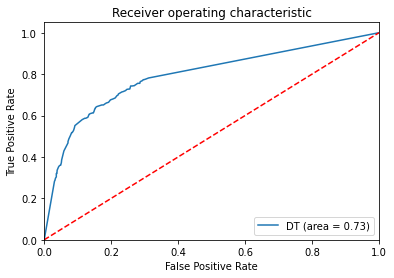

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [33]:
clf.predict_proba(X_test)
#clf.predict(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.21052632, 0.78947368],
       ...,
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.3       , 0.7       ]])

In [34]:
len(Churn.columns)

12

In [35]:
#Fit a Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_features=4,
                             max_depth=10,min_samples_split=20) #max_features=4
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.867

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.79      0.48      0.60       622

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000



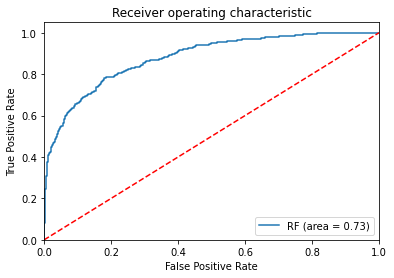

In [36]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [37]:
# Fit a AdaBoost model
clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(clf)

0.86
AdaBoostClassifier(learning_rate=0.3, n_estimators=100)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.48      0.58       622

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



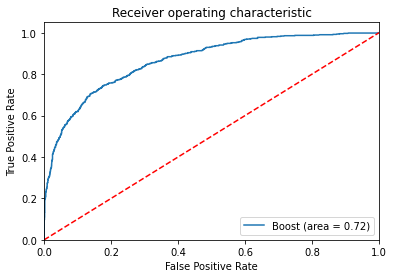

In [38]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Boost_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Boost (area = %0.2f)' % Boost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [47]:
#Fit a Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100)#,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(clf)

0.867
GradientBoostingClassifier()


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.48      0.58       622

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



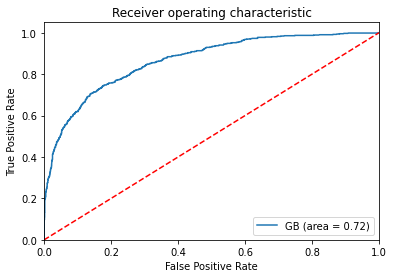

In [39]:
print(classification_report(y_test,y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GB_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % GB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [40]:
pd.DataFrame(X.columns, clf.feature_importances_).sort_index(0)

0
0.00        HasCrCard
0.00            Spain
0.01           Tenure
0.06             Male
0.06          Germany
0.07   IsActiveMember
0.09  EstimatedSalary
0.10          Balance
0.12      CreditScore
0.19    NumOfProducts
0.30              Age

In [41]:
round(sum(clf.feature_importances_))

1